In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
from data import load_data_viz_data
data = load_data_viz_data()

In [3]:
data

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,SHOOTING,OCCURRED_ON_DATE,LAT,LONG,NAME,LAT_POLICE_STATION,LONG_POLICE_STATION
0,I192068249,Other,0,2015-08-28 10:20:00,42.330119,-71.084251,Roxbury,42.328894,-71.085359
1,I182074094,Violence and harassment,0,2015-09-14 09:31:00,42.315142,-71.067047,Roxbury,42.328894,-71.085359
2,I182054888,Violence and harassment,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359
3,I182054888,Other,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359
4,I182054888,Other,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359
...,...,...,...,...,...,...,...,...,...
237216,I172049757,Police investigation procedure,0,2018-08-09 18:00:00,42.355216,-71.060129,Charlestown,42.361800,-71.060300
237217,I172049757,Drugs and disorderly conduct,0,2018-08-09 18:00:00,42.355216,-71.060129,Charlestown,42.361800,-71.060300
237218,I172027369,Other,0,2018-12-12 05:00:00,42.376852,-71.068873,Charlestown,42.361800,-71.060300
237219,I172027369,Police investigation procedure,0,2018-12-12 05:00:00,42.376852,-71.068873,Charlestown,42.361800,-71.060300


# Graph crime against time

In [4]:
data['OCCURRED_ON_DATE'] = pd.to_datetime(data['OCCURRED_ON_DATE'])

In [5]:
data['OCCURRED_ON_DATE'].sort_values()

43282    2015-06-15 00:00:00
145652   2015-06-15 00:00:00
74932    2015-06-15 00:00:00
185670   2015-06-15 00:00:00
38887    2015-06-15 00:00:00
                 ...        
180232   2018-12-31 23:15:00
214825   2018-12-31 23:20:00
200583   2018-12-31 23:30:00
133540   2018-12-31 23:41:00
28440    2018-12-31 23:45:00
Name: OCCURRED_ON_DATE, Length: 237221, dtype: datetime64[ns]

In [6]:
data['year-month'] = data['OCCURRED_ON_DATE'].dt.to_period('M')

In [7]:
data

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,SHOOTING,OCCURRED_ON_DATE,LAT,LONG,NAME,LAT_POLICE_STATION,LONG_POLICE_STATION,year-month
0,I192068249,Other,0,2015-08-28 10:20:00,42.330119,-71.084251,Roxbury,42.328894,-71.085359,2015-08
1,I182074094,Violence and harassment,0,2015-09-14 09:31:00,42.315142,-71.067047,Roxbury,42.328894,-71.085359,2015-09
2,I182054888,Violence and harassment,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359,2015-07
3,I182054888,Other,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359,2015-07
4,I182054888,Other,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359,2015-07
...,...,...,...,...,...,...,...,...,...,...
237216,I172049757,Police investigation procedure,0,2018-08-09 18:00:00,42.355216,-71.060129,Charlestown,42.361800,-71.060300,2018-08
237217,I172049757,Drugs and disorderly conduct,0,2018-08-09 18:00:00,42.355216,-71.060129,Charlestown,42.361800,-71.060300,2018-08
237218,I172027369,Other,0,2018-12-12 05:00:00,42.376852,-71.068873,Charlestown,42.361800,-71.060300,2018-12
237219,I172027369,Police investigation procedure,0,2018-12-12 05:00:00,42.376852,-71.068873,Charlestown,42.361800,-71.060300,2018-12


In [8]:
data = data.drop_duplicates()

In [9]:
df_time = data.copy()

In [10]:
df_time = df_time.drop(columns=['OFFENSE_CODE_GROUP'])

In [11]:
df_time.drop_duplicates()

,INCIDENT_NUMBER,SHOOTING,OCCURRED_ON_DATE,LAT,LONG,NAME,LAT_POLICE_STATION,LONG_POLICE_STATION,year-month
0,I192068249,0,2015-08-28 10:20:00,42.330119,-71.084251,Roxbury,42.328894,-71.085359,2015-08
1,I182074094,0,2015-09-14 09:31:00,42.315142,-71.067047,Roxbury,42.328894,-71.085359,2015-09
2,I182054888,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359,2015-07
5,I172075854,0,2015-09-02 09:00:00,42.314013,-71.086353,Roxbury,42.328894,-71.085359,2015-09
6,I172065681,0,2015-07-25 02:00:00,42.316339,-71.068800,Roxbury,42.328894,-71.085359,2015-07
...,...,...,...,...,...,...,...,...,...
237212,I182000363,0,2018-01-02 12:43:00,42.376889,-71.066846,Charlestown,42.361800,-71.060300,2018-01
237213,I182000283,0,2018-01-02 05:33:00,42.377364,-71.057914,Charlestown,42.361800,-71.060300,2018-01
237214,I182000153,0,2018-01-01 12:55:00,42.376836,-71.064205,Charlestown,42.361800,-71.060300,2018-01
237215,I172049757,0,2018-08-09 18:00:00,42.355216,-71.060129,Charlestown,42.361800,-71.060300,2018-08


In [12]:
df_time2 = pd.pivot_table(data=df_time,
                                values='INCIDENT_NUMBER',
                                index=['year-month'],
                                aggfunc='count')
#df_time2.reset_index(inplace=True)

In [13]:
df_time2 = df_time2.iloc[1: , :]

In [14]:
df_time2.columns=['Nuber of incidents']

In [15]:
pd.plotting.register_matplotlib_converters()

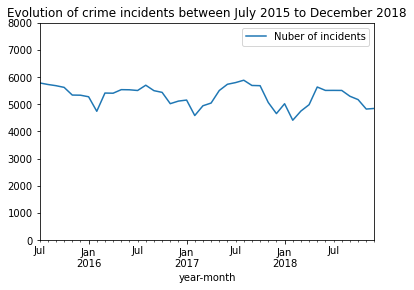

In [16]:
df_time2.plot()
plt.title('Evolution of crime incidents between July 2015 to December 2018')
plt.ylim(0,8000);

# Main categories

In [17]:
data2 = pd.read_csv('https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/boston_crimes_regression.csv')
data2.head()

,MEDIAN_AGE,TOTAL_POP,PERC_OF_30_34,PERC_MARRIED_COUPLE_FAMILY,PER_CAPITA_INCOME,PERC_OTHER_STATE_OR_ABROAD,PERC_LESS_THAN_HIGH_SCHOOL,PERC_COLLEGE_GRADUATES,CODE,NB_INCIDENTS,NAME
0,30.8,55297,52.8,26.4,41261,8.6,6.7,10.5,D14,13788,Brighton
1,35.7,19890,28.2,36.4,75339,3.4,7.9,8.2,A15,4765,Charlestown
2,33.4,126909,28.2,26.6,29767,2.4,18.0,17.1,C11,32875,Dorchester
3,33.5,18306,32.5,35.8,80057,14.8,15.4,6.9,A1,26260,Downtown
4,30.6,47263,31.1,30.4,31473,3.5,27.2,11.5,A7,9691,East Boston


In [18]:
df_cat = data2[['NAME','NB_INCIDENTS']]

In [19]:
df_cat = df_cat.sort_values(by='NB_INCIDENTS', ascending=False)

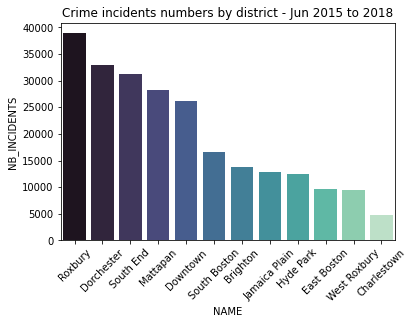

In [20]:
sns.barplot(data=df_cat, x=df_cat['NAME'], y=df_cat['NB_INCIDENTS'], palette="mako")
plt.title('Crime incidents numbers by district - Jun 2015 to 2018')
plt.xticks(rotation=45);

In [21]:
df_most_common = pd.pivot_table(data=data,
                                values='INCIDENT_NUMBER',
                                index=['NAME'],
                                columns=['OFFENSE_CODE_GROUP'],
                                aggfunc='count')
df_most_common.columns.name = None
df_most_common

,Disputes,Drugs and disorderly conduct,Fraud and law violations,Larceny and vandalism,Other,Police investigation procedure,Violence and harassment
NAME,,,,,,,
Brighton,562,666,1743,5067,911,2760,1559
Charlestown,200,343,419,1622,332,1148,532
Dorchester,3065,2088,3449,8764,2707,7259,3821
Downtown,254,1796,3139,8966,1929,5362,3335
East Boston,597,846,1020,2836,855,1912,1255
Hyde Park,1145,666,1339,3390,1064,2961,1491
Jamaica Plain,619,890,1273,4403,1050,2565,1371
Mattapan,3567,1681,2791,6318,2331,6879,3675
Roxbury,3446,2454,4561,9963,3474,7818,5130


In [22]:
df_most_common["sum"] = df_most_common.sum(axis=1)

In [23]:
df_most_common

,Disputes,Drugs and disorderly conduct,Fraud and law violations,Larceny and vandalism,Other,Police investigation procedure,Violence and harassment,sum
NAME,,,,,,,,
Brighton,562,666,1743,5067,911,2760,1559,13268
Charlestown,200,343,419,1622,332,1148,532,4596
Dorchester,3065,2088,3449,8764,2707,7259,3821,31153
Downtown,254,1796,3139,8966,1929,5362,3335,24781
East Boston,597,846,1020,2836,855,1912,1255,9321
Hyde Park,1145,666,1339,3390,1064,2961,1491,12056
Jamaica Plain,619,890,1273,4403,1050,2565,1371,12171
Mattapan,3567,1681,2791,6318,2331,6879,3675,27242
Roxbury,3446,2454,4561,9963,3474,7818,5130,36846


In [24]:
df_most_common

,Disputes,Drugs and disorderly conduct,Fraud and law violations,Larceny and vandalism,Other,Police investigation procedure,Violence and harassment,sum
NAME,,,,,,,,
Brighton,562,666,1743,5067,911,2760,1559,13268
Charlestown,200,343,419,1622,332,1148,532,4596
Dorchester,3065,2088,3449,8764,2707,7259,3821,31153
Downtown,254,1796,3139,8966,1929,5362,3335,24781
East Boston,597,846,1020,2836,855,1912,1255,9321
Hyde Park,1145,666,1339,3390,1064,2961,1491,12056
Jamaica Plain,619,890,1273,4403,1050,2565,1371,12171
Mattapan,3567,1681,2791,6318,2331,6879,3675,27242
Roxbury,3446,2454,4561,9963,3474,7818,5130,36846
